# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [3]:
!pip install ucimlrepo --quiet
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)


# !wget https://archive.ics.uci.edu/static/public/235/data.csv -o household_power_consumption.txt

/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [5]:
df_raw = X.copy()
# df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

In [6]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [8]:
df_raw.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [9]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [10]:
#create your Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.head()

<ipython-input-10-0ed7d3192c4c>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [11]:
#convert all data columns to numeric types
df = df.apply(lambda x: pd.to_numeric(x, errors = 'coerce') if x.name not in ['Date', 'Time', 'Datetime'] else x)


Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [12]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [13]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]


It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [14]:
df.Date[0]

datetime.date(2006, 12, 16)

In [15]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [16]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

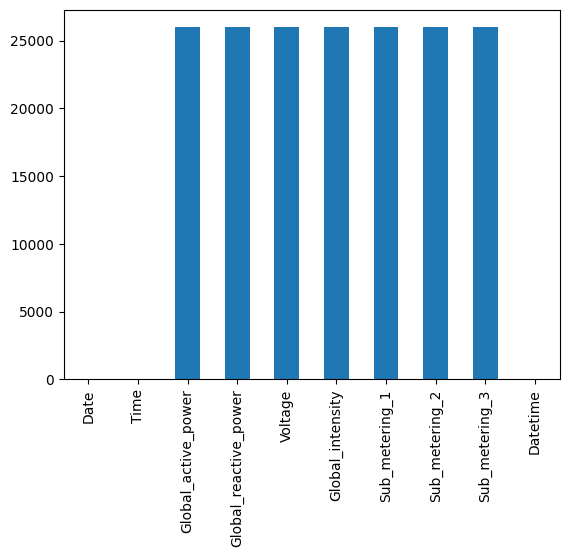

In [17]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

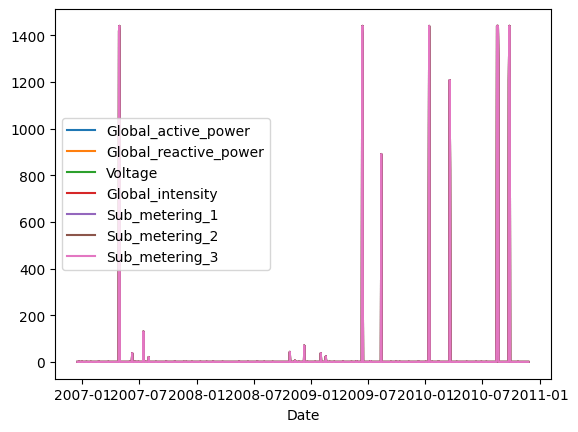

In [18]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

**Q: What do you notice about the pattern of missing data?**

A: After inspecting the above plotted graph, I can notice:
 -  We can see there are periods where there are many missing values, followed by periods where there are very few or no missing values. The missing data appears to be clustered or grouped together.
 -  When there are missing values in one column, it is likely that there are also missing values in other columns for the same date/time period. Kind of looks as periodic.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: Given the observations about the pattern of missing data, here's a plausible and reasoning behind the methods we could opt:


 -  Clustered missing data: As we've noticed, the missing data appears in clusters thus this characteristic makes forward fill or backward fill suitable options. These methods propagate the last observed value forward or the next observed value backward to fill the gaps. Why this method? Because this approach preserves the temporal structure within the clusters and avoids introducing drastic changes in the data.
 -  Periodicity : If there is a seasonal component to the missing data (as hinted at in the visualization), forward/backward fill can help retain this seasonality. Since it uses neighboring values, it's more likely to capture any repeating patterns compared to methods like mean imputation.
 - Correlation: Considering the correlation between missing values in different columns, filling with nearby values can maintain the relationships between these columns. If we were to use an independent method for each column (like mean imputation), we might lose this inter-column relationship.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [19]:
#clean up missing data here
df = df.fillna(method='ffill')


<ipython-input-19-e4ae63ef1e0b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [20]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259
mean,1.0862,0.1233,240.8416,4.6042,1.1110,1.2880,6.4166,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,239.0000,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.5980,0.1000,241.0200,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5240,0.1940,242.8700,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0532,0.1125,3.2356,4.4268,6.1159,5.7869,8.4195,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: After going through the data descriptions are available at the data source link, it seems **Global_active_power , Global_reactive_power ,Voltage ,Sub_metering_1** are more time dependent variable and can make more sense in visualizing over time. Reasons are illustrated below :

-  Overall Electricity Consumption: By visualizing **Global_active_power**, we can understand the general trend and patterns of electricity usage in the household over time.
- Reactive Power and Appliance Usage: Comparing **Global_reactive_power** with Global_active_power can reveal information about the types of appliances being used and their energy consumption characteristics. Higher reactive power often indicates the presence of inductive loads.
-  Voltage Stability: Monitoring **Voltage** over time helps identify potential issues with the electricity supply, which can affect appliance performance and overall energy consumption.
- Specific Appliance Usage: By including **Sub_metering_1**, we can focus on the energy consumption of kitchen appliances, providing a more granular view of usage patterns.

Original Data Visualization


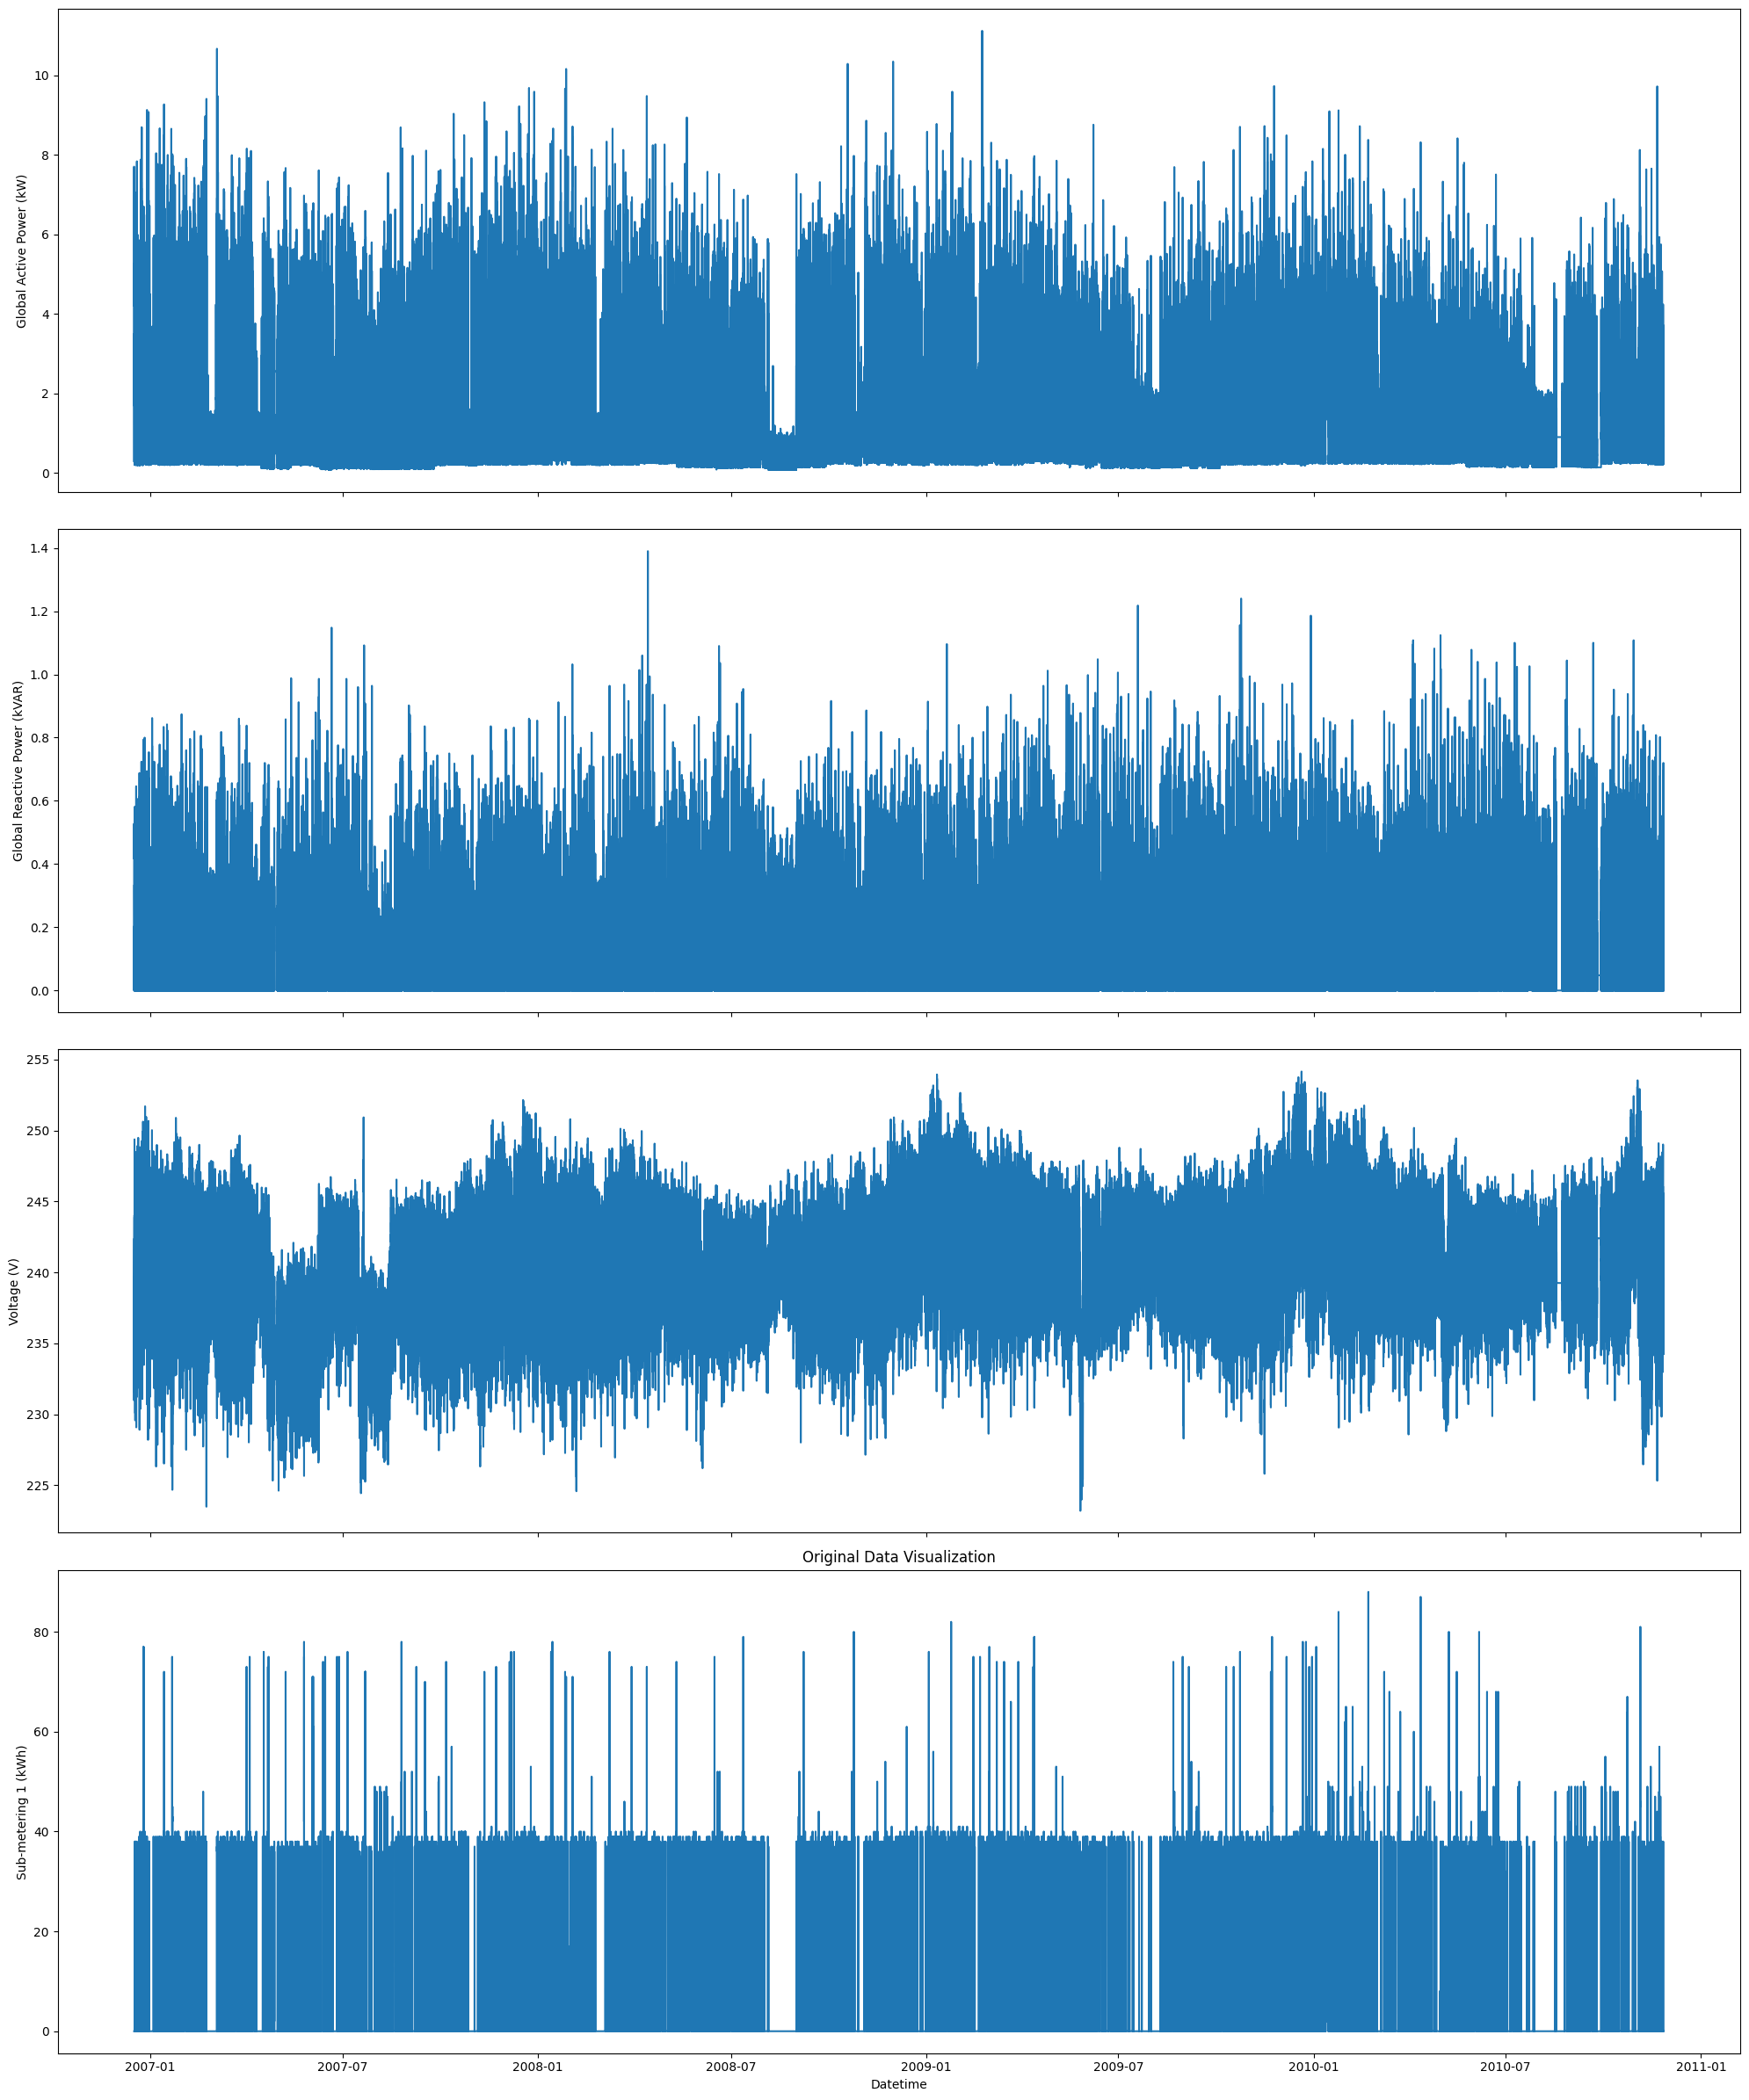

In [52]:
#build your line chart here

import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 1, figsize=(20, 24), sharex=True)

# Plot Global_active_power
axes[0].plot(df['Datetime'], df['Global_active_power'])
axes[0].set_ylabel('Global Active Power (kW)')

# Plot Global_reactive_power
axes[1].plot(df['Datetime'], df['Global_reactive_power'])
axes[1].set_ylabel('Global Reactive Power (kVAR)')

# Plot Voltage
axes[2].plot(df['Datetime'], df['Voltage'])
axes[2].set_ylabel('Voltage (V)')

# Plot Sub_metering_1
axes[3].plot(df['Datetime'], df['Sub_metering_1'])
axes[3].set_ylabel('Sub-metering 1 (kWh)')
axes[3].set_xlabel('Datetime')

print('Original Data Visualization :')
plt.title('Original Data Visualization')
plt.tight_layout()
plt.show()

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A: Following observations can be made from visualizing the raw data :



1.
There appears to be a significant drop in all metrics around the beginning of 2009. Not sure why but maybe be due to a power outage or a change in data collection methods.


2.  There's a clear seasonal pattern in the data, with higher values during the winter months and lower values in the summer. This is likely due to increased energy usage for heating and cooling.

3.  There's a slight upward trend in Global Active Power over the time period shown. This could indicate increased electricity consumption over time.

4. There are occasional spikes and dips in the data that appear as outliers. These could indicate unusual events like power surges or temporary device malfunctions.


Although the raw data visualization provides some initial insights, I believe it's not the most effective way to analyze this type of time series data because:

-  The high-frequency fluctuations and potential outliers make it difficult to identify underlying patterns and trends. The visualization appears noisy and cluttered, hindering a clear understanding of the data's behavior over time.
-  The raw data represents individual measurements at a very fine granularity. This level of detail can be overwhelming and doesn't necessarily provide a meaningful overview of the overall energy consumption patterns.

.



A better approach could've been by aggregating the data over longer time intervals, like monthly averages, to smooth out fluctuations and reveal broader trends. Also applying moving averages to further reduce noise and highlight underlying patterns by calculating averages of consecutive data points.

.

Focus on specific features of interest instead of plotting all variables together to provide a clearer picture. Identify and address potential outliers to improve the accuracy and clarity of the visualization.



**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

In [54]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

df_monthly_gap = df.groupby(pd.Grouper(key='Datetime', freq='ME'))['Global_active_power'].mean()
df_monthly_grp = df.groupby(pd.Grouper(key='Datetime', freq='ME'))['Global_reactive_power'].mean()
df_monthly_vol = df.groupby(pd.Grouper(key='Datetime', freq='ME'))['Voltage'].mean()
df_monthly_sm1 = df.groupby(pd.Grouper(key='Datetime', freq='ME'))['Sub_metering_1'].mean()




Monthly Average of Original Data :


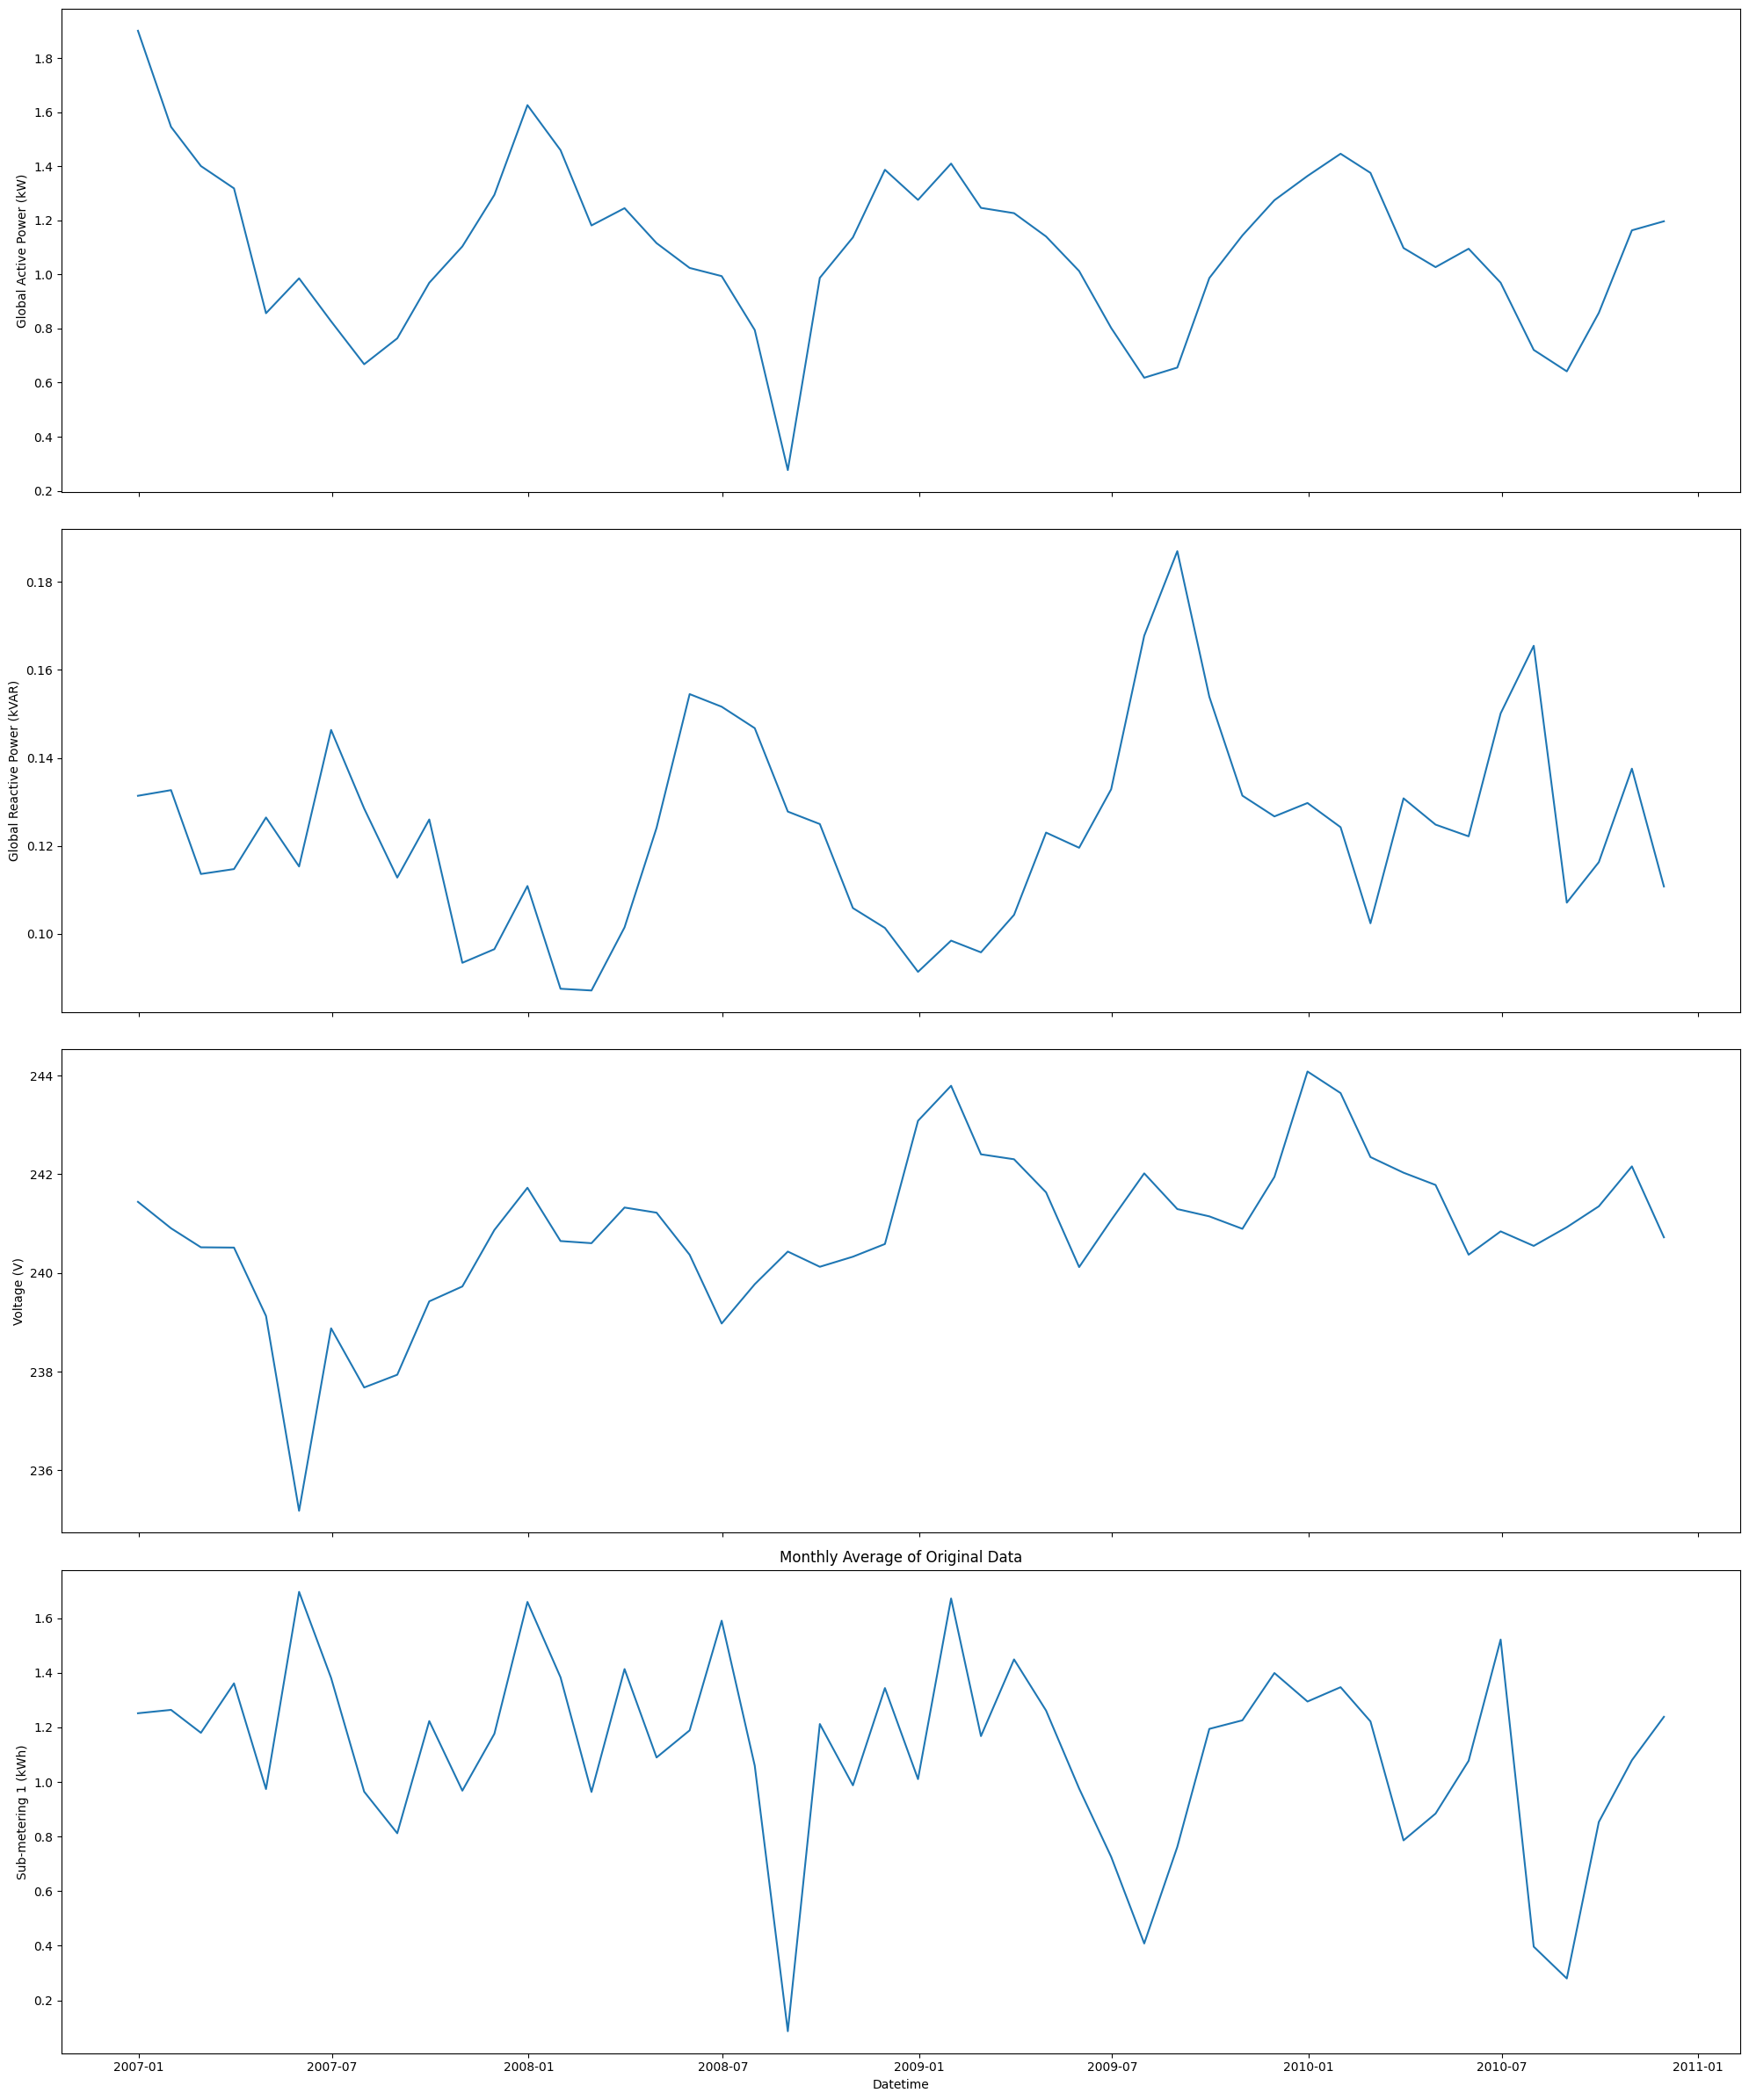

In [59]:
#build your linechart here
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 1, figsize=(20, 24), sharex=True)

# Plot Global_active_power
axes[0].plot(df_monthly_gap.index, df_monthly_gap)
axes[0].set_ylabel('Global Active Power (kW)')

# Plot Global_reactive_power
axes[1].plot(df_monthly_grp.index, df_monthly_grp)
axes[1].set_ylabel('Global Reactive Power (kVAR)')

# Plot Voltage
axes[2].plot(df_monthly_vol.index, df_monthly_vol)
axes[2].set_ylabel('Voltage (V)')

# Plot Sub_metering_1
axes[3].plot(df_monthly_sm1.index, df_monthly_sm1)
axes[3].set_ylabel('Sub-metering 1 (kWh)')
axes[3].set_xlabel('Datetime')

print('Monthly Average of Original Data :')
plt.title('Monthly Average of Original Data')
plt.tight_layout()
plt.show()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: Again there seems to be a clear seasonal pattern in all four graphs, with peaks and troughs occurring at regular intervals. This suggests that there is a cyclical component to the data, which could be related to factors such as weather, holidays, or other recurring events.

Yes the variables seem to move together, the four graphs seem to be correlated to some degree, meaning that they move in similar directions at the same time. This suggests that there might be a common underlying factor influencing all four variables.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [56]:
#compute your moving average here
df_moving_monthly_gap = df.groupby(pd.Grouper(key='Datetime', freq='30D'))['Global_active_power'].mean()
df_moving_monthly_grp = df.groupby(pd.Grouper(key='Datetime', freq='30D'))['Global_reactive_power'].mean()
df_moving_monthly_vol = df.groupby(pd.Grouper(key='Datetime', freq='30D'))['Voltage'].mean()
df_moving_monthly_sm1 = df.groupby(pd.Grouper(key='Datetime', freq='30D'))['Sub_metering_1'].mean()


Moving Average of Original Data :


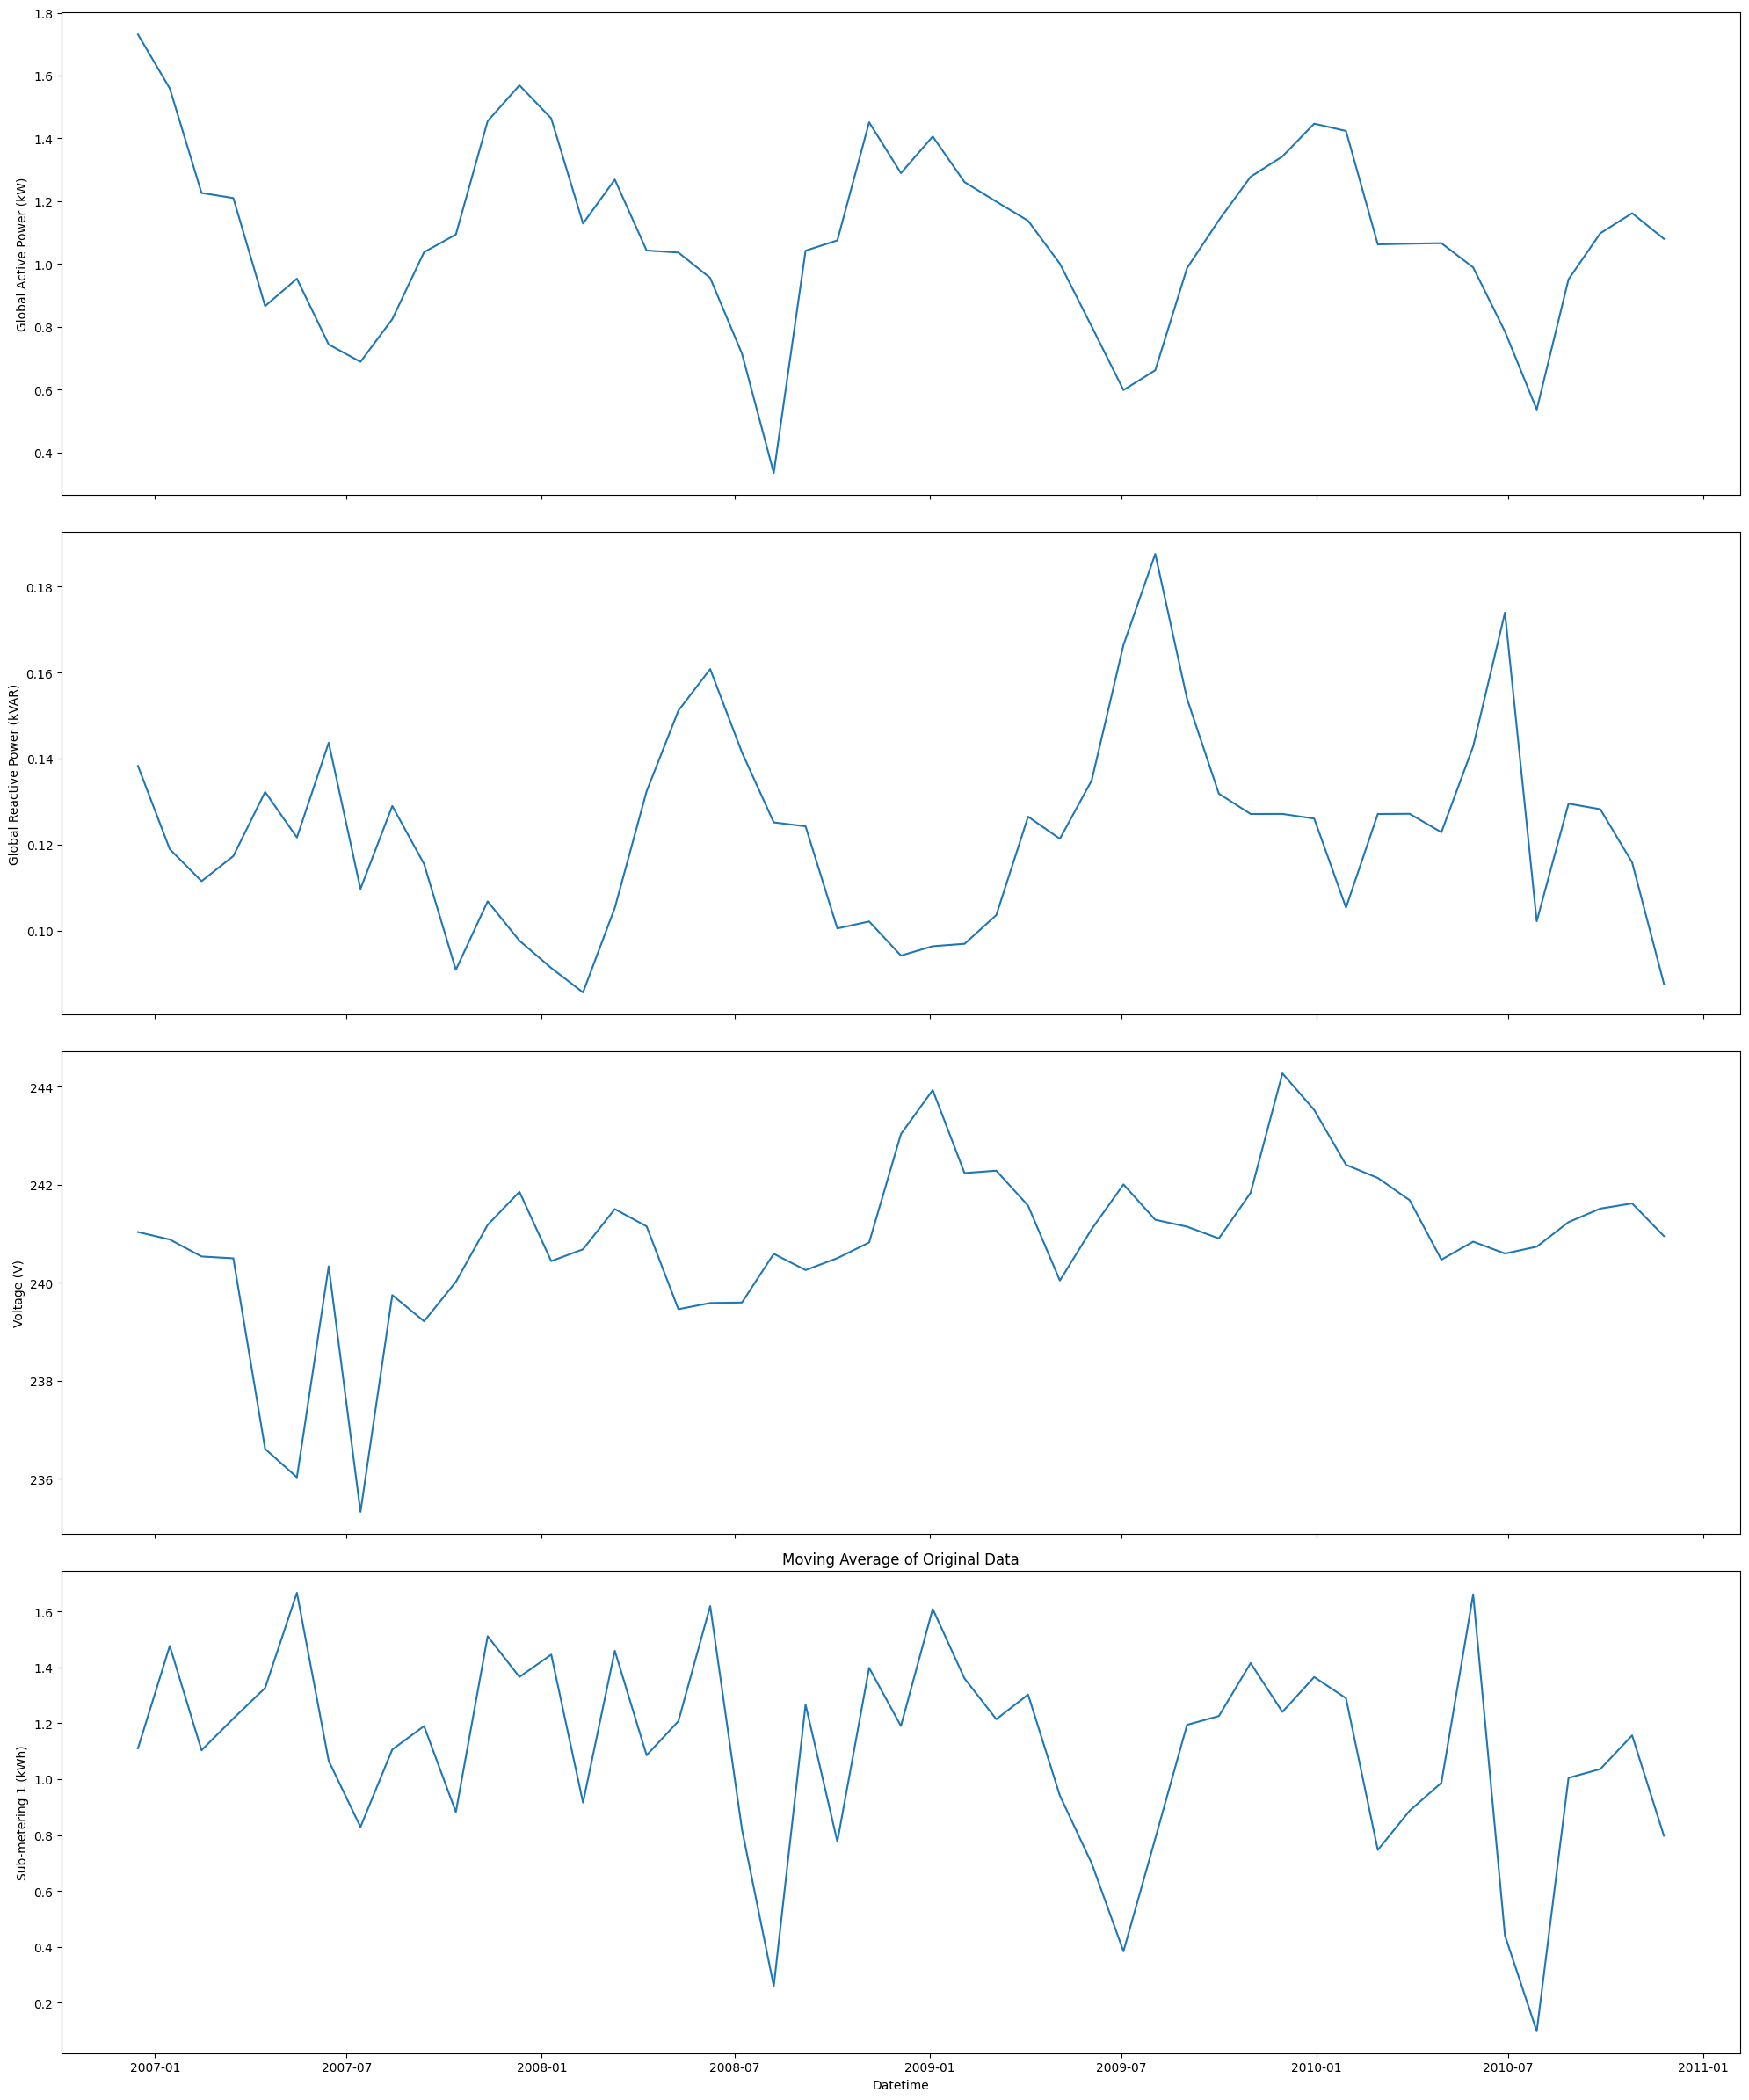

In [58]:
#build your line chart on the moving average here
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 1, figsize=(20, 24), sharex=True)

# Plot Global_active_power
axes[0].plot(df_moving_monthly_gap.index, df_moving_monthly_gap)
axes[0].set_ylabel('Global Active Power (kW)')

# Plot Global_reactive_power
axes[1].plot(df_moving_monthly_grp.index, df_moving_monthly_grp)
axes[1].set_ylabel('Global Reactive Power (kVAR)')

# Plot Voltage
axes[2].plot(df_moving_monthly_vol.index, df_moving_monthly_vol)
axes[2].set_ylabel('Voltage (V)')

# Plot Sub_metering_1
axes[3].plot(df_moving_monthly_sm1.index, df_moving_monthly_sm1)
axes[3].set_ylabel('Sub-metering 1 (kWh)')
axes[3].set_xlabel('Datetime')

print('Moving Average of Original Data :')
plt.title('Moving Average of Original Data')
plt.tight_layout()
plt.show()



**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The Moving average in comparision to the Monthly average is more effective when trying to capture long-term trends and remove noise. The Monthly average would have been more effective for understanding seasonal patterns but if the goal is to analyze the overall trend, the moving average is better as it provides a continuous view of data without sudden jumps.

**Since we are dealing with time series data where oure goal is to uncover patterns, trends, and seasonality that can inform further analysis and machine learning models. The monthly average would more effective because :**

-  Moving average smooths short-term fluctuations, making long-term trends clearer.
-  Monthly average aggregates data per month, which may obscure short-term variations.
-  Moving average is better for detecting trends and preparing data for machine learning models.
-  Monthly average is useful for identifying seasonality but may miss intra-month patterns.
-  Machine learning models benefit from moving average as it helps extract trend-related features.
-  Moving average reduces noise, making anomalies and deviations easier to detect.


## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

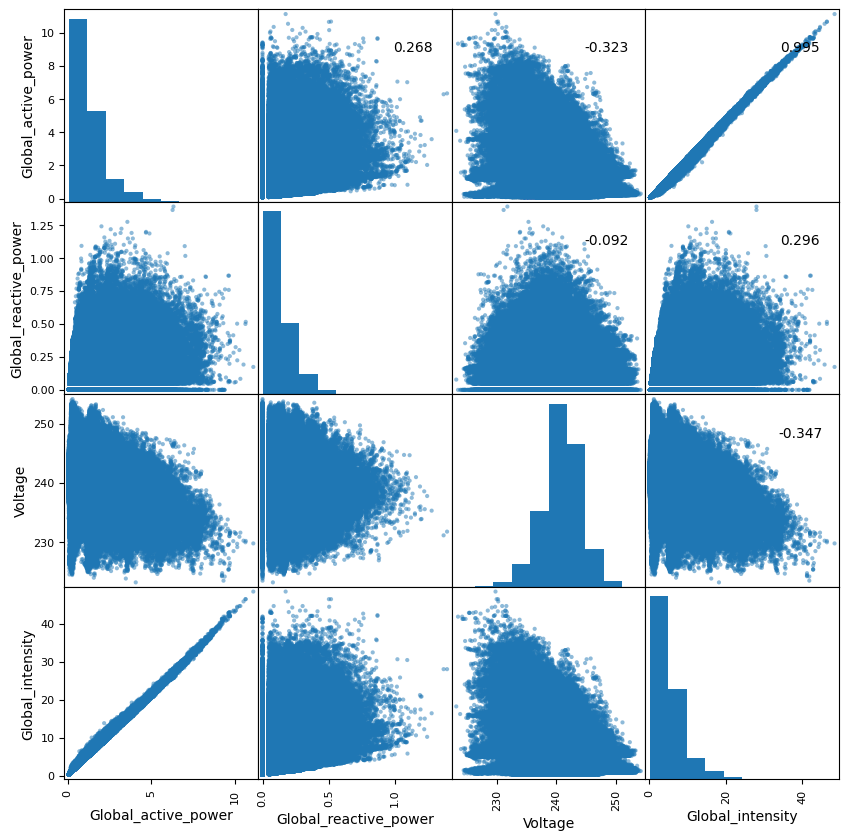

In [60]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A:
## **Patterns and Correlations noticed :**
-  **Strong +ve Correlation:** Global Active Power and Global Intensity have a very strong positive correlation (correlation coefficient of 0.995). This means that as one increases, the other increases almost proportionally.
-  **Weak +ve Correlation:** Global Active Power and Global Reactive Power exhibit a weak positive correlation (0.268).
-  **Weak -ve Correlation:** Voltage and Global Intensity show a weak negative correlation (-0.347).
-  **Almost no Correlation:** Global Reactive Power and Voltage have almost no correlation (-0.092).

##**Effect on downstream tasks and how it can help:**
-  **Feature Selection:**
The strong correlation between Global Active Power and Global Intensity suggests that one of them could potentially be dropped during feature selection without losing much information. *This can help in reducing the dimensionality of the data and simplifying the model.*
-  **Multicollinearity:**
The strong positive correlation might also lead to multicollinearity issues in regression models. Multicollinearity occurs when two or more independent variables are highly correlated, *which can destabilize the model and make it difficult to interpret the coefficients.*
-  **Model Choice:**
The correlations can influence the choice of model. For example, if we are building a model to predict Global Active Power, *we might consider using Global Intensity as a strong predictor.*
-  **Data Transformation:**
In some cases, it might be beneficial to apply transformations (like logarithmic) to the data *to reduce the impact of strong correlations and improve model performance.*